<a href="https://colab.research.google.com/github/lilian662/EDO/blob/main/30_04_25EDPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Serie de Fourier generalizada de u(x) = e^{-x}:
u(x) ≈ 0.51433 * exp(-x) * sin(1πx) + 0.24991 * exp(-x) * sin(2πx) + 0.23054 * exp(-x) * sin(3πx) + 0.13422 * exp(-x) * sin(4πx) + 0.14225 * exp(-x) * sin(5πx) + 0.09072 * exp(-x) * sin(6πx) + 0.10241 * exp(-x) * sin(7πx) + 0.06837 * exp(-x) * sin(8πx) + 0.07991 * exp(-x) * sin(9πx) + 0.05482 * exp(-x) * sin(10πx)


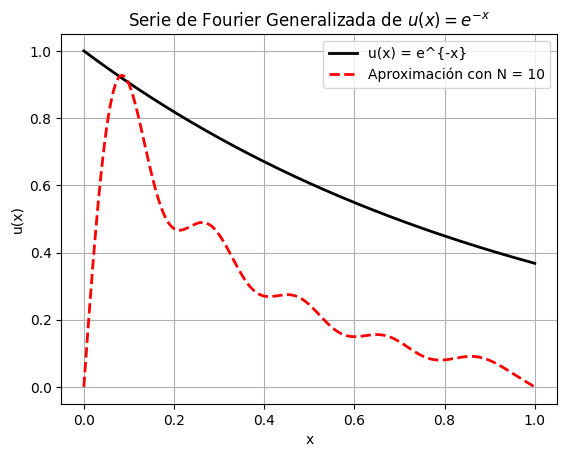

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Dominio de x
x = np.linspace(0, 1, 500)
u_exacta = np.exp(-x)

# Número de términos en la serie
N = 10
u_aprox = np.zeros_like(x)

# Función base de eigenfunciones: e^{-x} * sin(nπx)
def f_n(n, x):
    return np.exp(-x) * np.sin(n * np.pi * x)

# Mostrar encabezado
print("Serie de Fourier generalizada de u(x) = e^{-x}:")
serie_str = "u(x) ≈ "

# Cálculo de coeficientes y construcción de la aproximación
for n in range(1, N + 1):
    # Peso w(x) = e^{2x}, función u(x) = e^{-x}
    integrando = lambda x_var: np.exp(-2 * x_var) * np.sin(n * np.pi * x_var)
    integral_result, _ = quad(integrando, 0, 1)
    a_n = 2 * integral_result  # por ortogonalidad con w(x) = e^{2x}

    # Sumar al aproximado
    u_aprox += a_n * f_n(n, x)

    # Imprimir el término
    term_str = f"{a_n:.5f} * exp(-x) * sin({n}πx)"
    serie_str += term_str
    if n != N:
        serie_str += " + "

# Mostrar la serie completa en consola
print(serie_str)

# Gráfica
plt.plot(x, u_exacta, 'k-', label='u(x) = e^{-x}', linewidth=2)
plt.plot(x, u_aprox, 'r--', label=f'Aproximación con N = {N}', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Serie de Fourier Generalizada de $u(x) = e^{-x}$')
plt.grid(True)
plt.legend()
plt.show()

